### 数据截断

Observed lifetimes at time 10:
 [ 3.04724505  0.71324229  4.61561531  4.06725713 10.          0.11911197
  1.36647337  2.98888904 10.          1.25609574  1.11399328  0.36085568
  3.69061745 10.          1.31770769  6.25372565  9.62531124  1.30363664
  4.89694335  0.67586678  4.25367348  1.65176347  9.96047114 10.
  4.08126471]


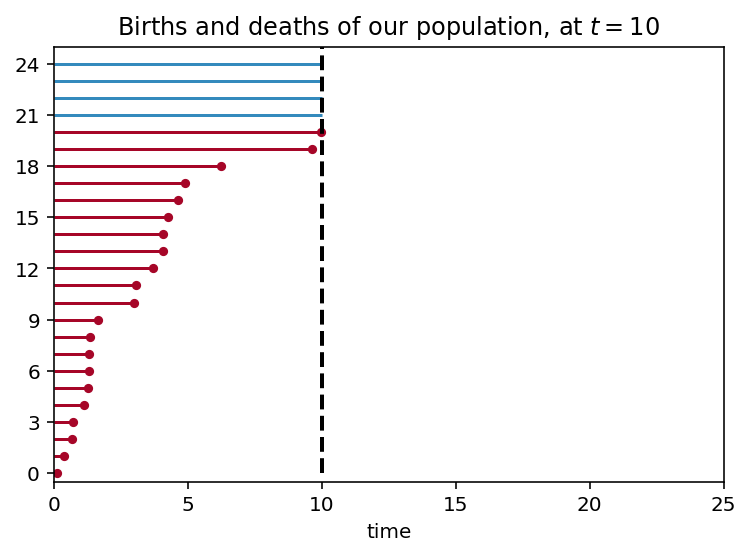

In [2]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

(0.0, 25.0)

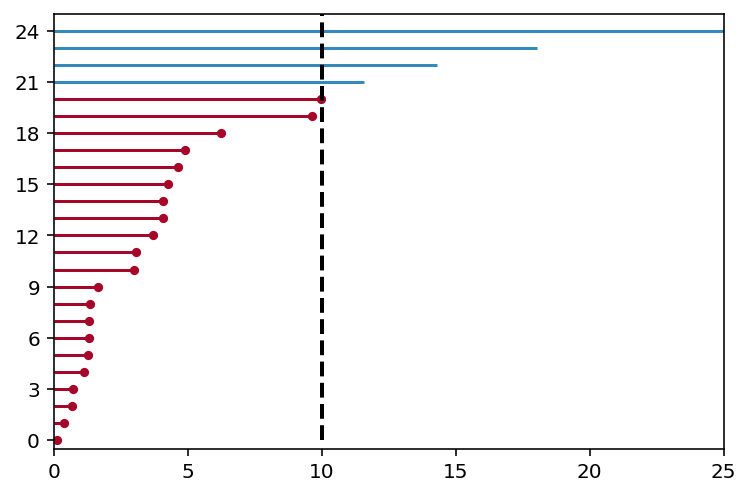

In [3]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

### 生存函数

In [4]:
from lifelines.datasets import load_dd

data = load_dd()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ctryname           1808 non-null   object 
 1   cowcode2           1808 non-null   int64  
 2   politycode         1801 non-null   float64
 3   un_region_name     1808 non-null   object 
 4   un_continent_name  1808 non-null   object 
 5   ehead              1808 non-null   object 
 6   leaderspellreg     1808 non-null   object 
 7   democracy          1808 non-null   object 
 8   regime             1808 non-null   object 
 9   start_year         1808 non-null   int64  
 10  duration           1808 non-null   int64  
 11  observed           1808 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 169.6+ KB


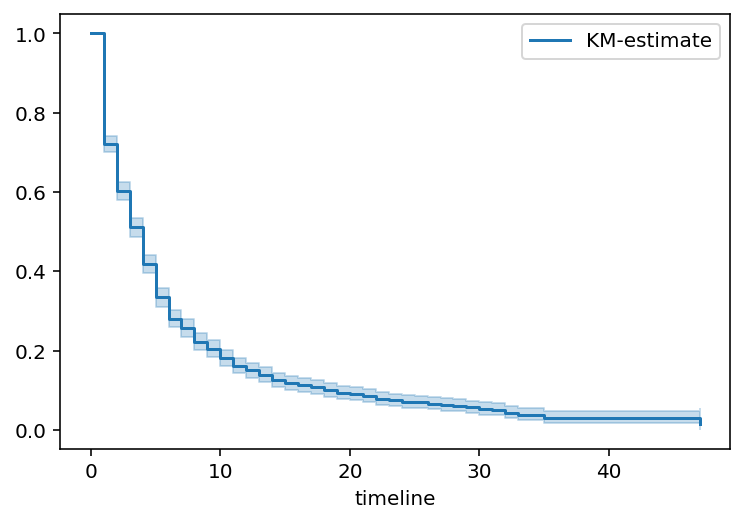

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E,label='KM-estimate')
kmf.plot()

In [8]:
kmf.median_survival_time_

4.0

In [7]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM-estimate_lower_0.95,KM-estimate_upper_0.95
0.5,3.0,4.0


##### 对民主政权与非民主政权进行细分

Text(0.5, 1.0, 'Lifespans of different global regimes')

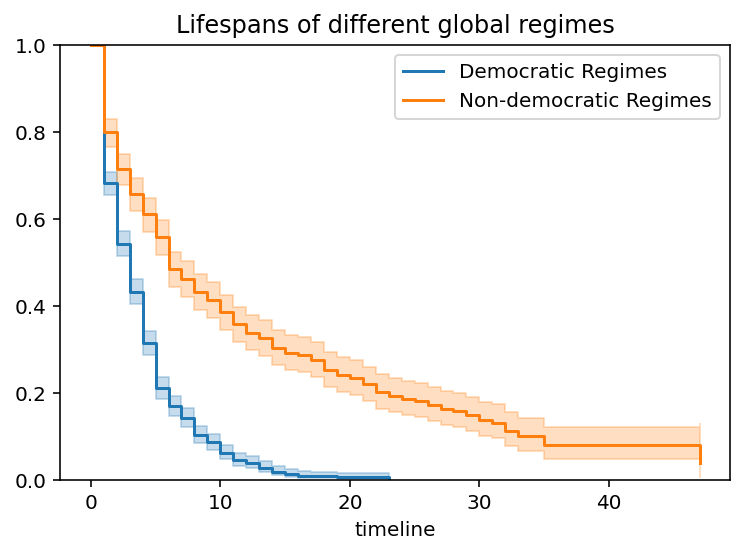

In [13]:
from lifelines.utils import median_survival_times
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from IPython.display import display


median_ci = median_survival_times(kmf.confidence_interval_)

ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
#民主政权
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)
#非民主政权
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes")

### Nelson Aslen估计

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


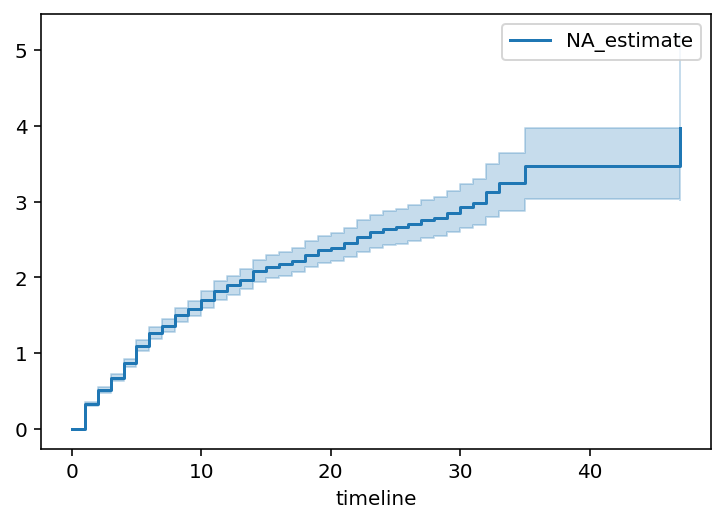

In [14]:
T = data["duration"]
E = data["observed"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

print(naf.cumulative_hazard_.head())
naf.plot()

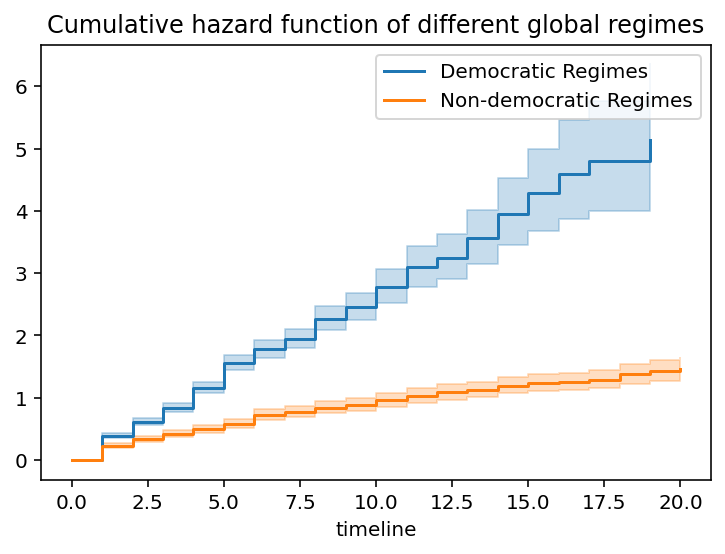

In [15]:
#对民主政权与非民主政权进行细分
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 20))

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 20))

plt.title("Cumulative hazard function of different global regimes");

### COX分析

In [16]:
from lifelines.datasets import load_rossi

from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary() 

##### 系数绘制

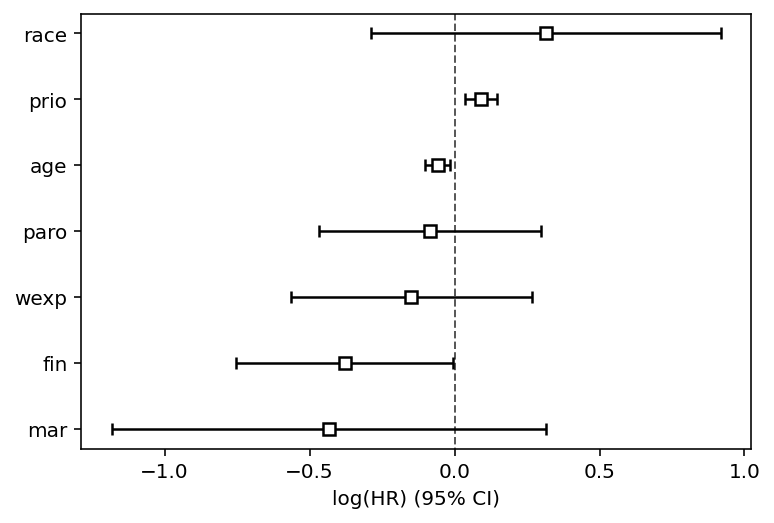

In [17]:
cph.plot()

##### 绘制改变协变量的效果

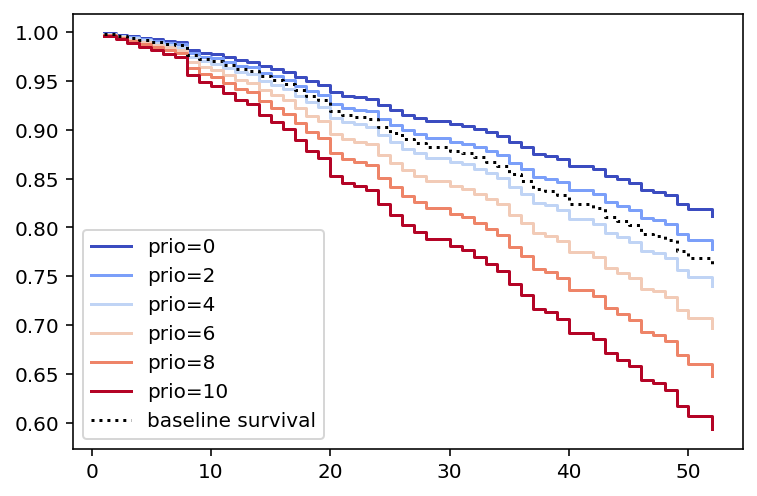

In [18]:
cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')